# Exploratory Data Analysis: energy and weather data

In [2]:
import pandas as pd
import numpy as np

## Load data

In [3]:
data = pd.read_csv('../data/interim/energy_weather_cleaned.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'datetime', 'energy', 'humidity', 'pressure',
       'temperature', 'weather', 'wind_direction', 'wind_speed'],
      dtype='object')

In [5]:
data = data.drop(labels='Unnamed: 0',axis=1)

In [6]:
data.dtypes

datetime           object
energy            float64
humidity          float64
pressure          float64
temperature       float64
weather            object
wind_direction    float64
wind_speed        float64
dtype: object

In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
data.dtypes

datetime          datetime64[ns]
energy                   float64
humidity                 float64
pressure                 float64
temperature              float64
weather                   object
wind_direction           float64
wind_speed               float64
dtype: object

In [9]:
data['year'] = data.datetime.dt.year
data['month'] = data.datetime.dt.month
data['month_name'] = data.datetime.dt.month_name()
data['day'] = data.datetime.dt.day
data['hour'] = data.datetime.dt.hour
data['day_name'] = data.datetime.dt.day_name()
data['weekday'] = data.datetime.dt.weekday

In [10]:
data

datetime   energy  humidity  pressure  temperature  \
0     2012-12-31 01:00:00  10445.0      68.0    1020.0       269.72   
1     2012-12-31 02:00:00   9897.0      73.0    1020.0       269.05   
2     2012-12-31 03:00:00   9538.0      68.0    1021.0       268.53   
3     2012-12-31 04:00:00   9333.0      79.0    1022.0       267.83   
4     2012-12-31 05:00:00   9275.0      85.0    1023.0       266.77   
...                   ...      ...       ...       ...          ...   
44076 2017-01-01 20:00:00  10882.0      64.0    1020.0       276.35   
44077 2017-01-01 21:00:00  10831.0      59.0    1019.0       277.05   
44078 2017-01-01 22:00:00  10691.0      55.0    1019.0       277.15   
44079 2017-01-01 23:00:00  10484.0      64.0    1020.0       276.16   
44080 2017-01-02 00:00:00  10114.0     100.0    1021.0       273.49   

               weather  wind_direction  wind_speed  year  month month_name  \
0      overcast clouds           290.0         6.0  2012     12   December   
1      overcast clouds           290.0         6.0  2012     12   December   
2      overcast clouds           280.0         6.0  2012     12   December   
3      overcast clouds           280.0         8.0  2012     12   December   
4      overcast clouds           270.0         6.0  2012     12   December   
...                ...             ...         ...   ...    ...        ...   
44076     sky is clear           210.0         2.0  2017      1    January   
44077     sky is clear            60.0         1.0  2017      1    January   
44078     sky is clear           182.0         1.0  2017      1    January   
44079     sky is clear            94.0         2.0  2017      1    January   
44080     sky is clear            94.0         2.0  2017      1    January   

       day  hour day_name  weekday  
0       31     1   Monday        0  
1       31     2   Monday        0  
2       31     3   Monday        0  
3       31     4   Monday        0  
4       31     5   Monday        0  
...    ...   ...      ...      ...  
44076    1    20   Sunday        6  
44077    1    21   Sunday        6  
44078    1    22   Sunday        6  
44079    1    23   Sunday        6  
44080    2     0   Monday        0  

[44081 rows x 15 columns]

## Investigate data count

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

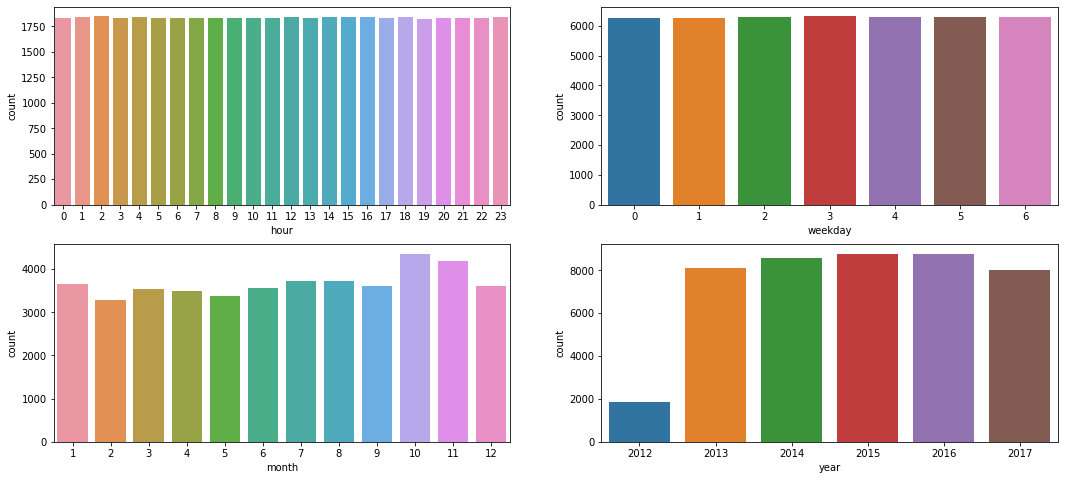

In [12]:
column_names = ['hour','weekday','month','year']
fig, axes = plt.subplots(2,2,figsize=(18,8))

count = 0
for col in column_names:
    i, j = divmod(count, 2)
    sns.countplot(x=col,data=data,ax=axes[i, j])
    count += 1
plt.show()

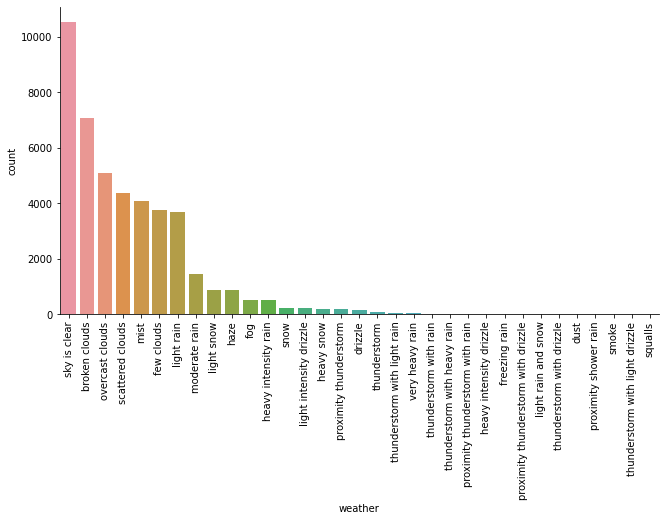

In [13]:
sns.catplot(x='weather',data=data,kind='count', height=5, aspect=2, order=data['weather'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

The data points between hours, days, and months appear to be equally distributed. Based on the year, 2012 contains significantly less number of points relative to years 2013 to 2017. For the weather types, there are about 7 types that make up most of the data (clear sky, broken clouds, overcast clouds, scattered clouds, mist, few clouds, and light rain). Other weather types are scarce.

## Investigate correlations

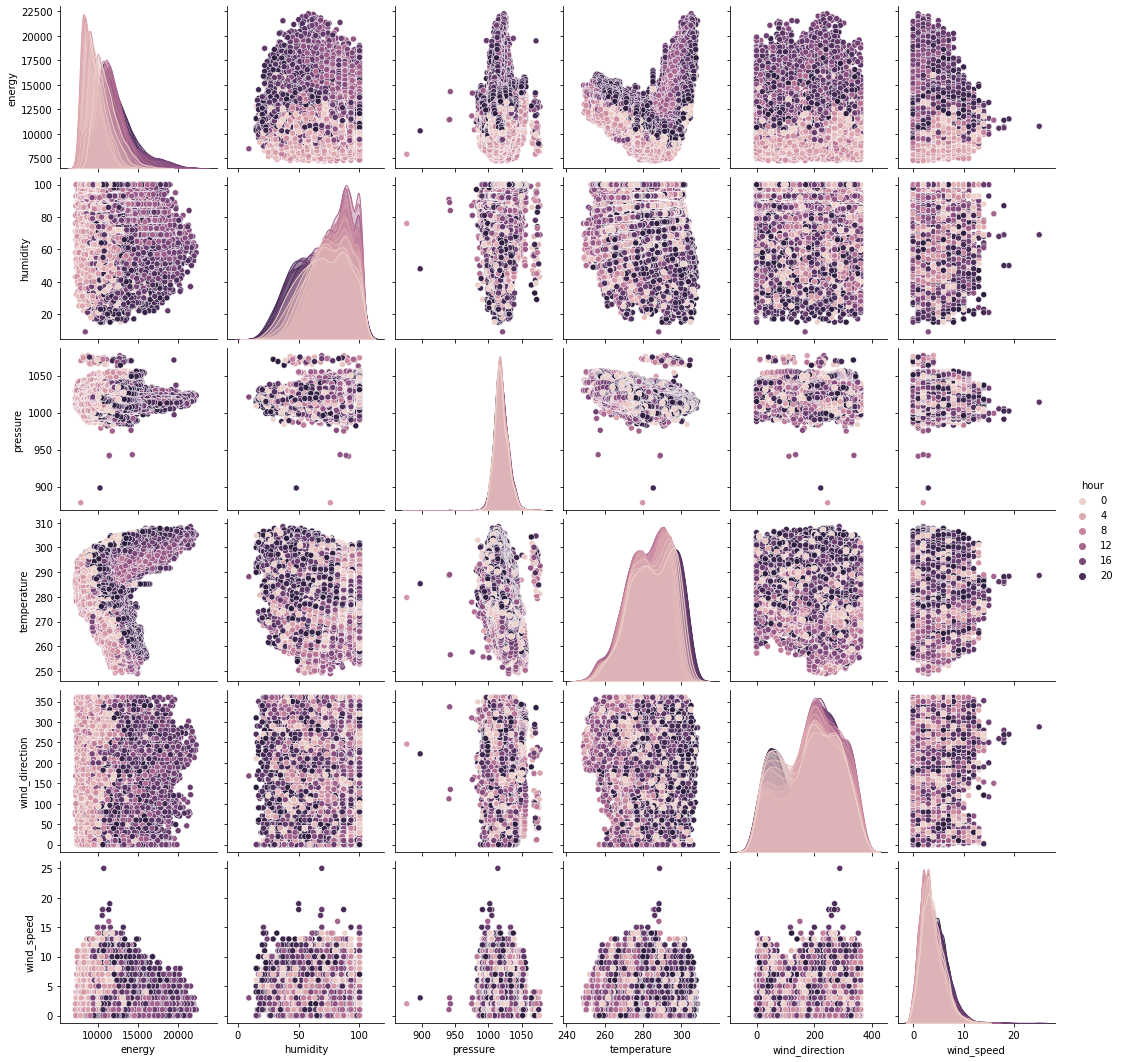

In [14]:
sns.pairplot(data, vars=data.columns[[1,2,3,4,6,7]], hue='hour')

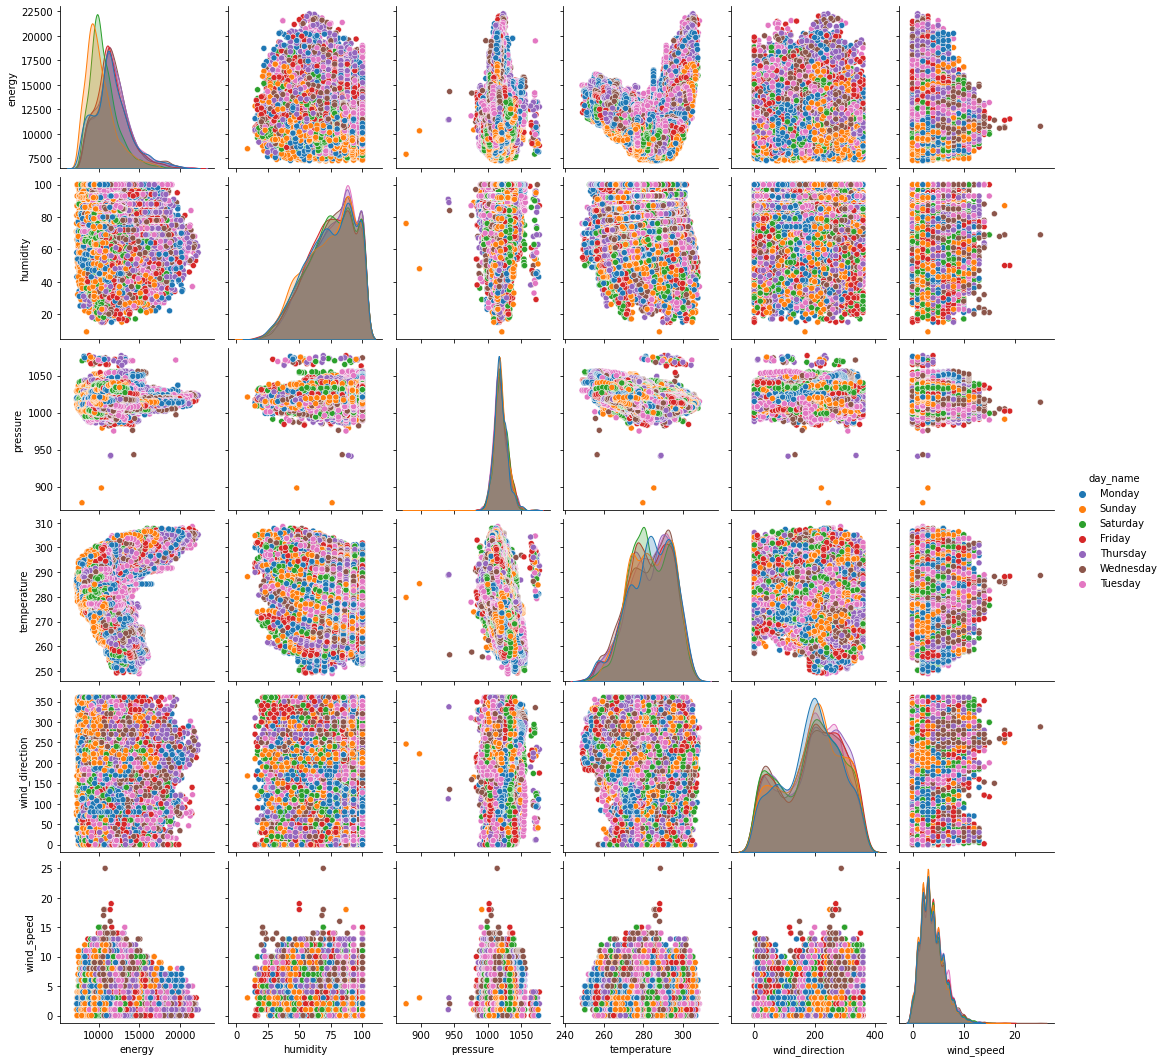

In [15]:
sns.pairplot(data, vars=data.columns[[1,2,3,4,6,7]], hue='day_name')

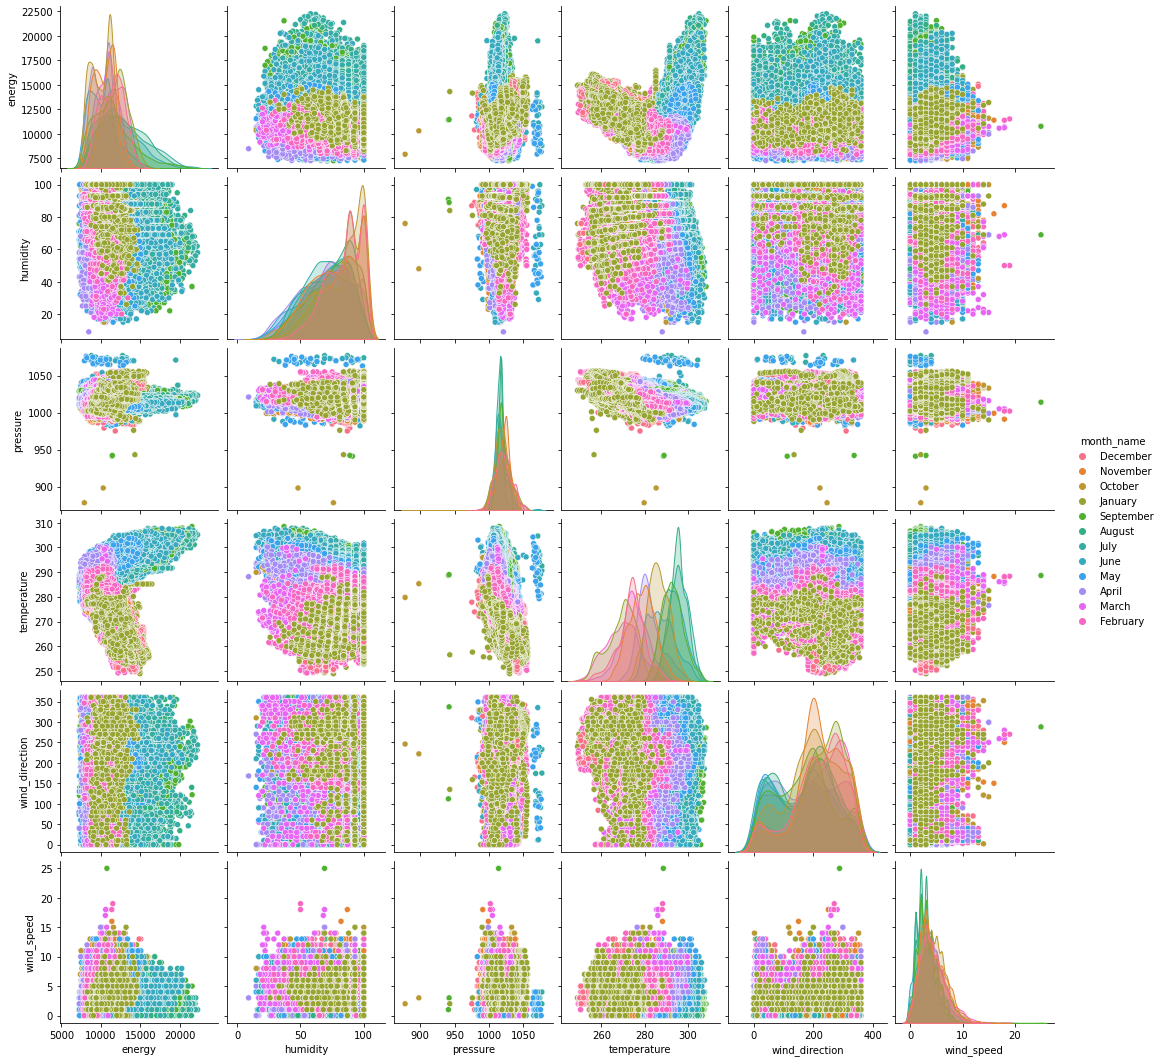

In [16]:
sns.pairplot(data, vars=data.columns[[1,2,3,4,6,7]], hue='month_name')

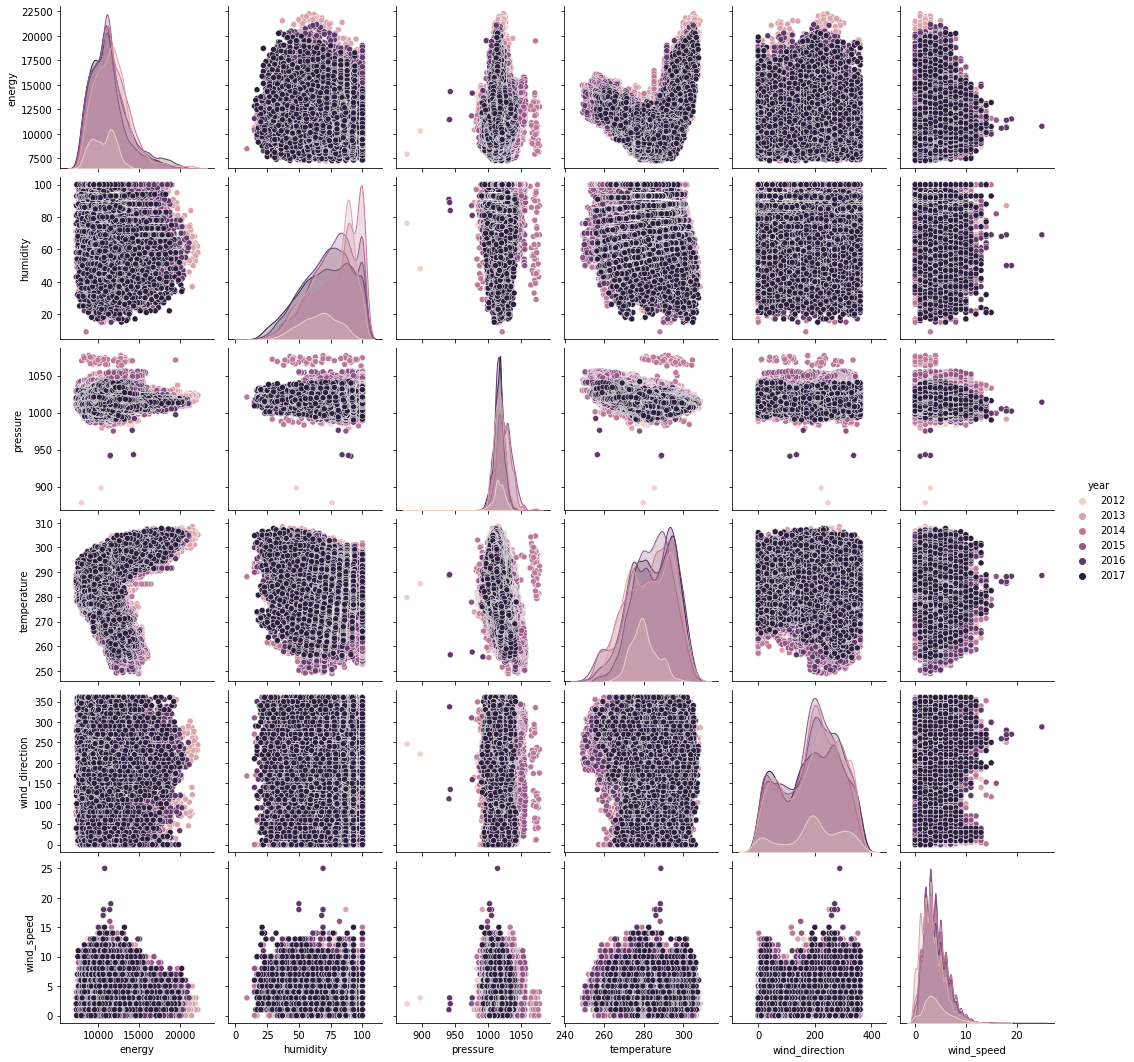

In [17]:
sns.pairplot(data, vars=data.columns[[1,2,3,4,6,7]], hue='year')

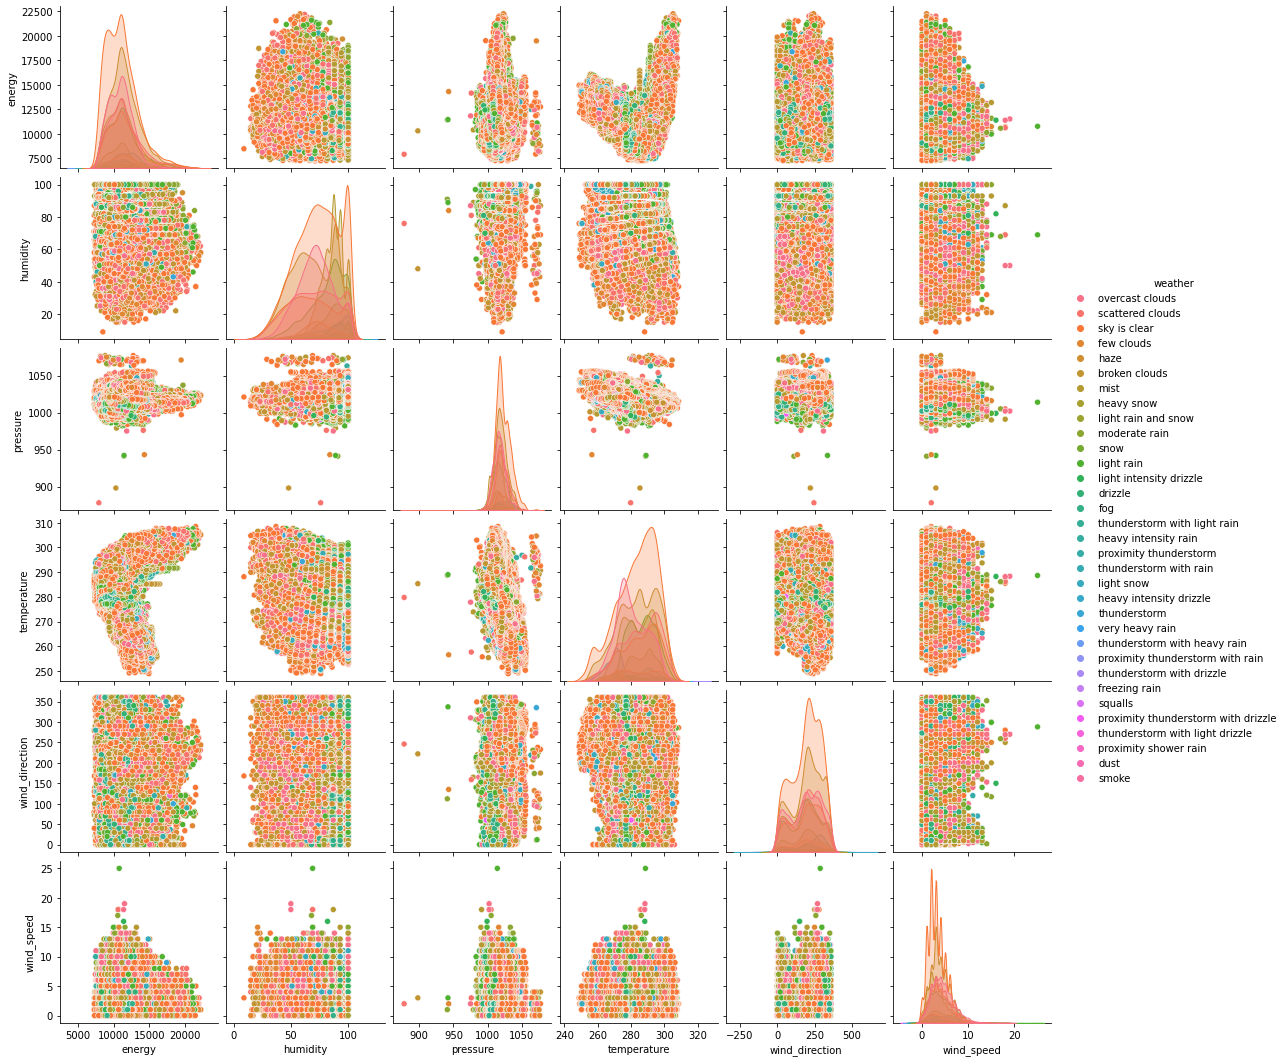

In [18]:
sns.pairplot(data, vars=data.columns[[1,2,3,4,6,7]], hue="weather")

The correlation between energy and temperature can be observed. The energies usages are high at extreme temperatures. Other than that, no clear correlations between energy, humidity, pressure, temperature, wind direction, and wind speed is noticeable. 

Further, hours and months appear to be distributed unevenly in these correlations. They are reasonable because different hours in a day indicate human activities while the months represent different seasonal weather trends. However, there is no clear distinction in the data by day name (Monday to Friday), year (no drastic change from year to year, similar histogram distributions), or weather type (recall that some weather types do not have enough data points). 

Lastly, pressure data appear to contain additional small clusters, which come from the year 2014. The issue must be investigated further.

## Get boxplot statistics

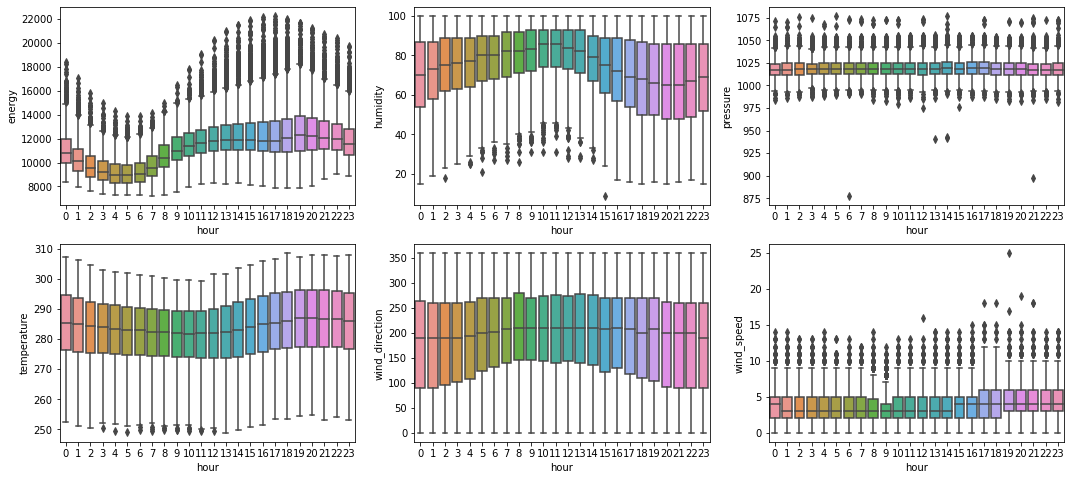

In [19]:
fig, axes = plt.subplots(2,3,figsize=(18,8))
column_names = data.columns[[1,2,3,4,6,7]]
count = 0
for col in column_names:
    i, j = divmod(count, 3)
    sns.boxplot(x='hour', y=col, data=data, ax=axes[i, j])
    count += 1
plt.show()

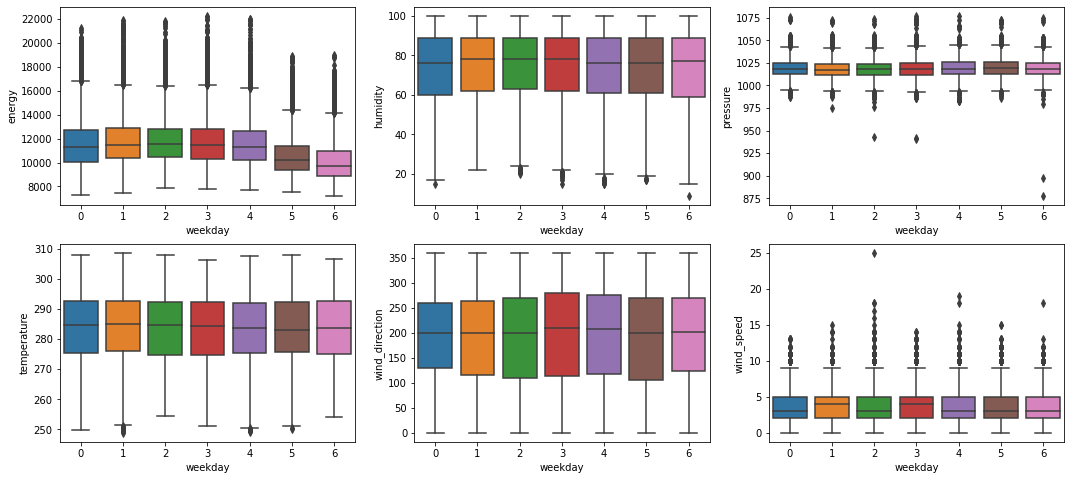

In [20]:
fig, axes = plt.subplots(2,3,figsize=(18,8))
column_names = data.columns[[1,2,3,4,6,7]]
count = 0
for col in column_names:
    i, j = divmod(count, 3)
    sns.boxplot(x='weekday', y=col, data=data, ax=axes[i, j])
    count += 1
plt.show()

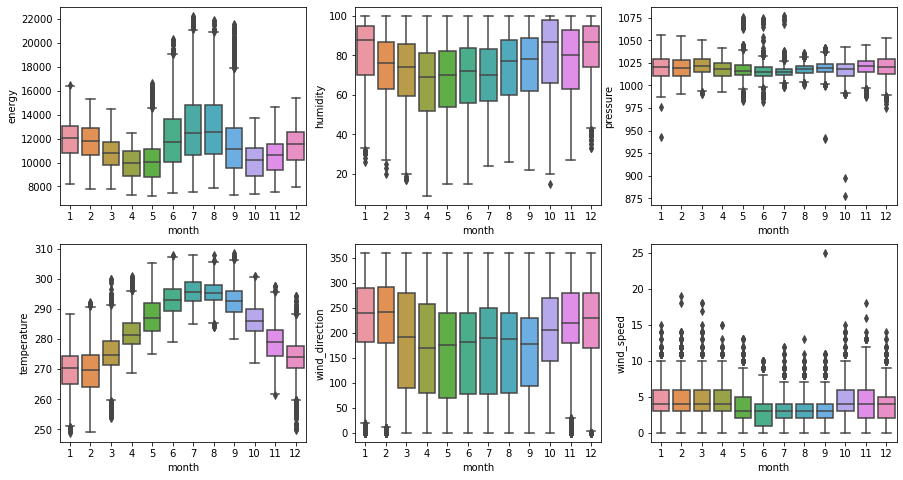

In [21]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
column_names = data.columns[[1,2,3,4,6,7]]
count = 0
for col in column_names:
    i, j = divmod(count, 3)
    sns.boxplot(x='month', y=col, data=data, ax=axes[i, j])
    count += 1
plt.show()

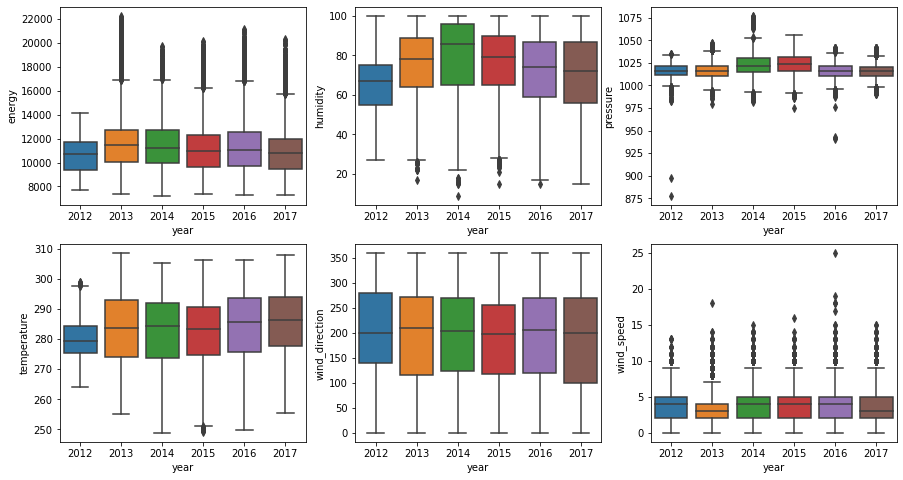

In [22]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
column_names = data.columns[[1,2,3,4,6,7]]
count = 0
for col in column_names:
    i, j = divmod(count, 3)
    sns.boxplot(x='year', y=col, data=data, ax=axes[i, j])
    count += 1
plt.show()

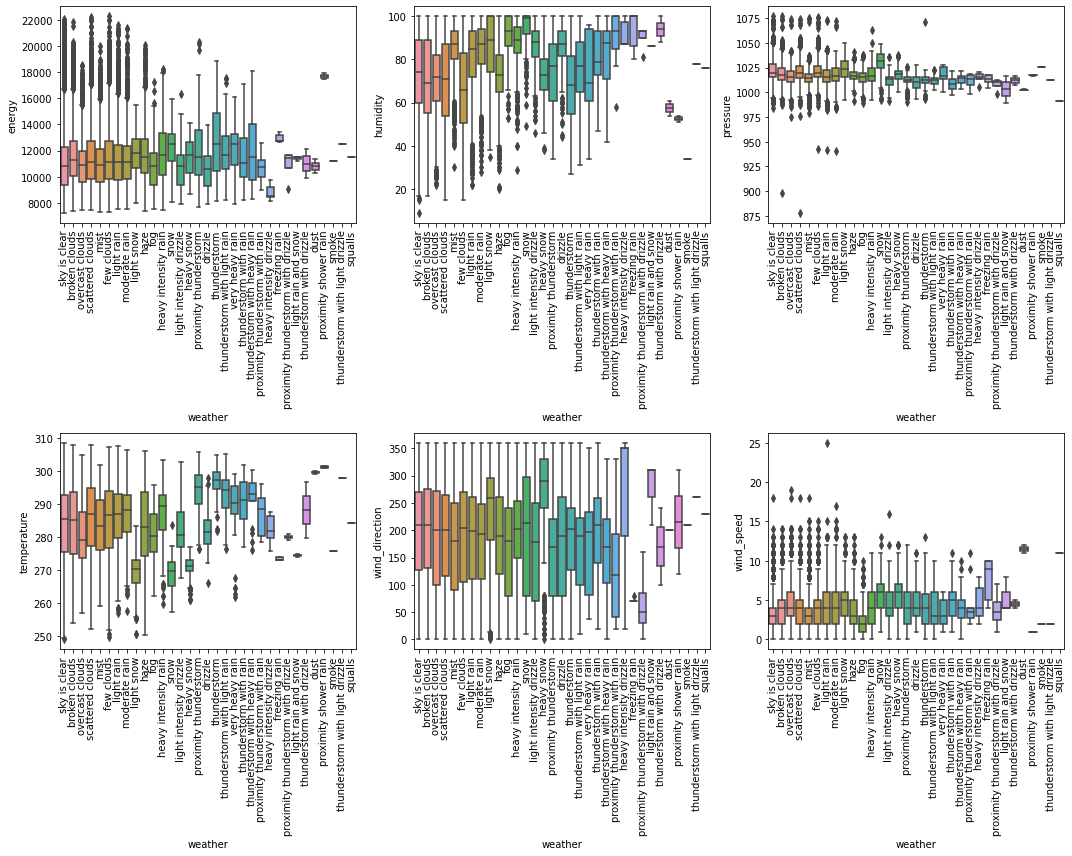

In [23]:
fig, axes = plt.subplots(2,3,figsize=(15,12))
column_names = data.columns[[1,2,3,4,6,7]]
count = 0
for col in column_names:
    i, j = divmod(count, 3)
    plot = sns.boxplot(x='weather', y=col, data=data, ax=axes[i, j],order=data['weather'].value_counts().index)
    plt.setp(plot.get_xticklabels(), rotation=90)
    count += 1
plt.tight_layout()
plt.show()

By hours and months, several changes in the median values can be observed especially for energy, humidity, temperature, and wind direction. The day of the week and year do not appear to influence the variables, which confirms the conclusion from pair plot. Based on the weather type, only a few weather types are correlated with variables such as snow events and temperature.

For these data, many boxplots are overlapped and a large number of outliers can be observed. In-depth investigation on outliers and clean up procedure must be performed.

In [26]:
data.to_csv('../data/interim/energy_weather_explore.csv')

In [27]:
data.head()

datetime   energy  humidity  pressure  temperature  \
0 2012-12-31 01:00:00  10445.0      68.0    1020.0       269.72   
1 2012-12-31 02:00:00   9897.0      73.0    1020.0       269.05   
2 2012-12-31 03:00:00   9538.0      68.0    1021.0       268.53   
3 2012-12-31 04:00:00   9333.0      79.0    1022.0       267.83   
4 2012-12-31 05:00:00   9275.0      85.0    1023.0       266.77   

           weather  wind_direction  wind_speed  year  month month_name  day  \
0  overcast clouds           290.0         6.0  2012     12   December   31   
1  overcast clouds           290.0         6.0  2012     12   December   31   
2  overcast clouds           280.0         6.0  2012     12   December   31   
3  overcast clouds           280.0         8.0  2012     12   December   31   
4  overcast clouds           270.0         6.0  2012     12   December   31   

   hour day_name  weekday  
0     1   Monday        0  
1     2   Monday        0  
2     3   Monday        0  
3     4   Monday        0  
4     5   Monday        0